**1. Imports & Load Dataset**

In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
import joblib


In [30]:
df = pd.read_csv("/content/insurance_dataset.csv")
df.shape


(83000, 32)

**2. Separate Categorical & Numerical Columns**

In [31]:
categorical_cols = [
    "city",
    "locality_category",
    "locality",
    "occupation_type",
    "policy_type",
    "natural_disaster_risk",
    "terrain_type",
    "urban_flood_risk"
]

target = "annual_premium"


**3. Encode Categorical Variables**

In [32]:
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


**4. Train–Test Split**

In [33]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


**5. Model Selection – Why XGBoost?**


*   Handles non-linearity

*   Robust to skewed income & premium

*   Works well with environmental + health features

*  SHAP compatible



**6. Train XGBoost Model**

In [34]:
model = XGBRegressor(
    n_estimators=350,
    max_depth=7,
    learning_rate=0.06,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=350,
             n_jobs=-1, num_parallel_tree=None, ...)

**7. Model Evaluation**

In [35]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score  : {r2:.4f}")
print(f"MAE       : ₹{mae:,.0f}")
print(f"RMSE      : ₹{rmse:,.0f}")


R² Score  : 0.9978
MAE       : ₹449
RMSE      : ₹567


**8. Feature Importance**

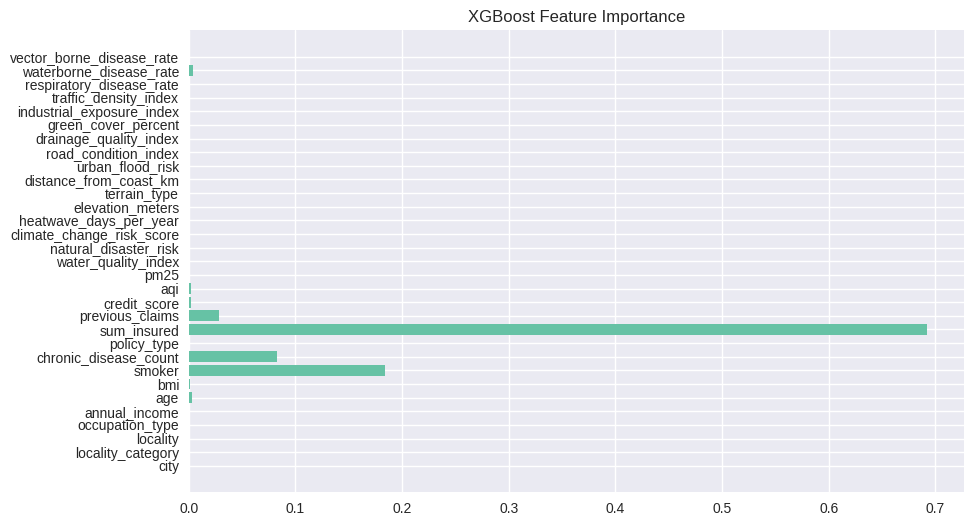

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()


**9. Save Model & Encoders**

In [37]:
joblib.dump(model, "model.pkl")
joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']